In [1]:
# %load A1_fit_C.py
# modules
%matplotlib inline
import numpy as np
from attention import *
#import pop
#from models import CueAlone, Naive
from common import *
import scipy.stats as sps
from IPython.display import Image
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import seaborn as sns

import attention
reload(attention)
from attention import *
import pop


In [106]:
# core data
if not locals().has_key('event_data'):
    event_data = cPickle.load(open('data/event_data.pickle'))
d = event_data[1]
#d =d.filter_units( d.Y__tn.mean( axis=0 ) > 7.6 )

61

In [ ]:
print(d.__dict__.keys())
d2 = d.group_by_trial
d.event_durations.sum()

In [107]:
def simD(d):
    #initialize
    N,T = d.spike_counts.shape
    #fast wave
    wave = (np.cos(np.linspace(-3,3,T)*90)*1)
    #slow wave
    wave2 = (np.cos(np.linspace(-3,3,T)*1)*1)
    #cue stm
    S__ts = d.S__ts
    
    # weights
    a = stats.ortho_group.rvs(dim=N) # generate orthogonal weigths
    #cue
    #u1 = np.zeros([2,N])
    u1 = np.random.normal(0,0.5,[2,N])
    #u1 = stats.ortho_group.rvs(dim=2)
    #u1[1,:] = 1 - u1[0,:]
    #slow
    v = np.random.normal(0,1,[N]) #
    #modulator
    w =np.random.normal(0,1,[N]) # a[0,:]# 
    
    #firing rate 
    fr = np.ones([T,N])
    fr[:] = 0.2
    
    # Modulators
    C = S__ts.dot(u1)
    D = wave2[:,na].dot(v[:,na].T)
    M =wave[:,na].dot(w[:,na].T)
    print(C.shape)
    print(S__ts.shape)
    print(u1.shape)
    #Simulated signal
    Y__tn = np.random.poisson(fr*(np.exp(C+D+M)),[T,N])
    d.spike_counts = Y__tn.T
    GT = {'wave':wave, 'wave2':wave2,'u1':u1,'v':v,'w':w,'a':a}
    return d, GT

#replace event set with simulation (only 5 neurons )
d,G = simD(d)
event_data[1]  = d    
    

(898, 62)
(898, 2)
(2, 62)


In [ ]:
plt.figure(0)
#plt.imshow(G['a'])
plt.figure(1)
plt.plot(G['w'])

Min avg SC 0.318436
Max avg SC 16.6369
Number of events 898
Number of units 62


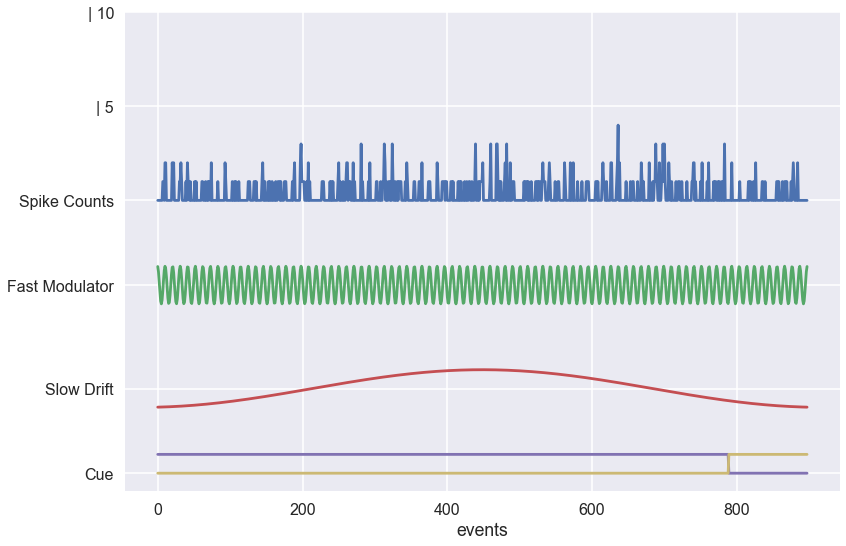

In [108]:
sns.set_context('poster')
sns.set_style('darkgrid')
plt.plot(d.Y__tn[:,[2]])
plt.plot(G['wave']-4.5)
plt.plot(G['wave2']-10)
#print(G['v'].dot(G['w']))
#print(G['w'])
plt.plot((d.S__ts)-14.5)
lables= np.array(['| 10','| 5','Spike Counts','Fast Modulator','Slow Drift','Cue'])
plt.yticks([10,5,0,-4.5,-10,-14.5], lables)
plt.xlabel('events')
#print(G['u1'])
#plt.savefig('ToyData.png', format='png', dpi=500)
print('Min avg SC %s'%((d.Y__tn.sum(axis=0,dtype =np.float32)/(d.event_durations.sum()/1000)).min()))
print('Max avg SC %s'%((d.Y__tn.sum(axis=0,dtype =np.float32)/(d.event_durations.sum()/1000)).max()))
print('Number of events %s'%(d.N_events))
print('Number of units %s'%(d.N_units))

In [109]:
#event data: 36 recording days, 50-130 units per day from two hemisheres

#fit CueAlone model
#for d in progress.numbers( event_data ):
#d_train, d_test = partition_d(d)
m = models.CueAlone( d, verbose=True )
#m_test = models.CueAlone( d_test, verbose=False, solve = False )
d.C = BaseModel({'C__sn':m.C__sn})
d.save_attribute('C')


solving for ZOptimization terminated successfully.
         Current function value: 355.364280
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 1
Optimization terminated successfully.
         Current function value: 767.969098
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 1
Optimization terminated successfully.
         Current function value: 673.845693
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 1
Optimization terminated successfully.
         Current function value: 454.905560
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 1
Optimization terminated successfully.
         Current function value: 519.443190
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
    

In [ ]:
m_test.C__sn = m.C__sn

In [ ]:
m.LL_per_obs

In [ ]:
m_test.LL_per_obs

In [ ]:
~np.isnan(d_train.spike_counts)

In [ ]:
plt.plot(d.spike_counts.T)

------- 



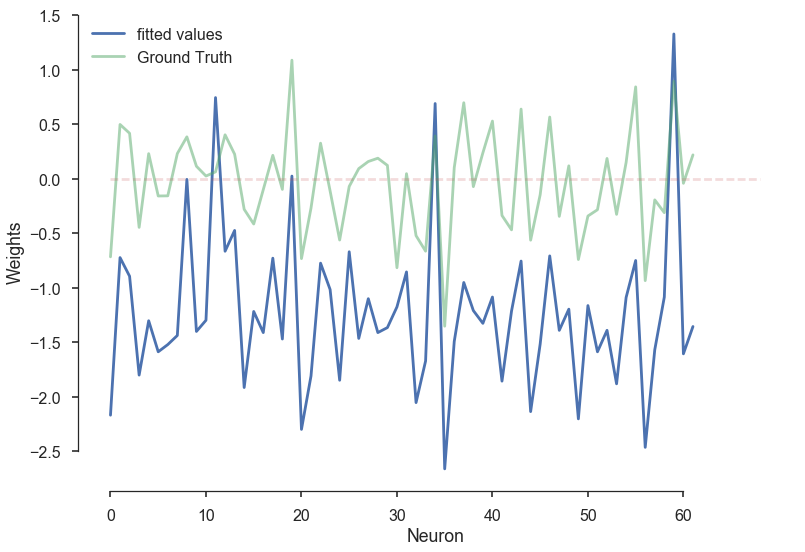

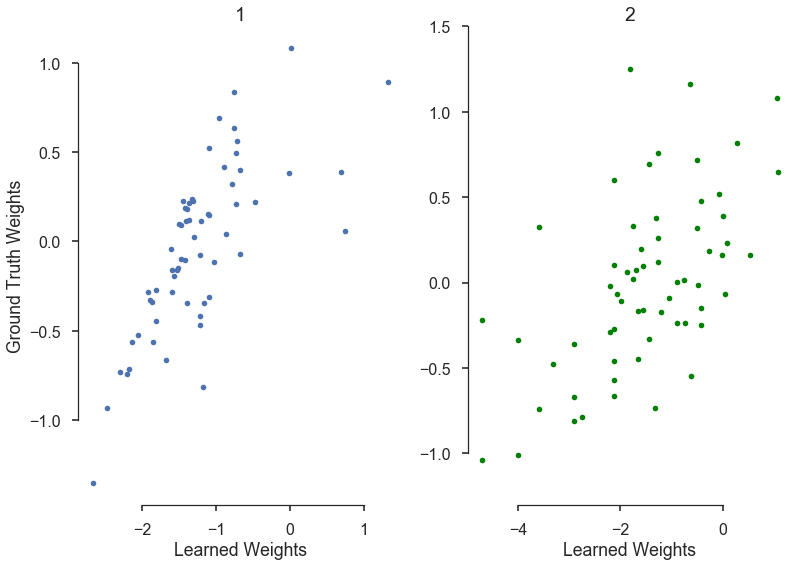

In [110]:
sns.set_style('ticks')
plt.figure(0)
plt.plot(d.C.C__sn[0,:].T,label = 'fitted values')
print('------- \n')
sns.despine(trim = 20)
plt.plot((G['u1'])[0,:].T,alpha = 0.5,label = 'Ground Truth')
plt.plot(np.linspace(0,68,68),np.zeros(68),'--',alpha = 0.2)
plt.xlabel('Neuron')
plt.ylabel('Weights')
plt.legend()
#plt.savefig('Figures/CueFit.png', format='png', dpi=500)
#plt.figure(1)
#sns.set_style('darkgrid')
#plt.hist(d.CG.C__sn[0,:].T)
#plt.hist(G['u1'][0,:].T,alpha = 0.3)
#plt.xlabel('weights')
#sns.despine(trim = 20)

plt.figure(1)
plt.subplot(1,2,1)
plt.title('1')
plt.plot(d.C.C__sn[0,:].T,G['u1'][0,:].T ,'.')
plt.xlabel('Learned Weights')
plt.ylabel('Ground Truth Weights')
sns.despine(trim = 20)


plt.subplot(1,2,2)
plt.title('2')
plt.plot(d.C.C__sn[1,:].T,G['u1'][1,:].T ,'g.')
plt.xlabel('Learned Weights')
#plt.ylabel('Ground Truth Weights')
plt.ylim([-1.3,1.5])
sns.despine(trim = 20)

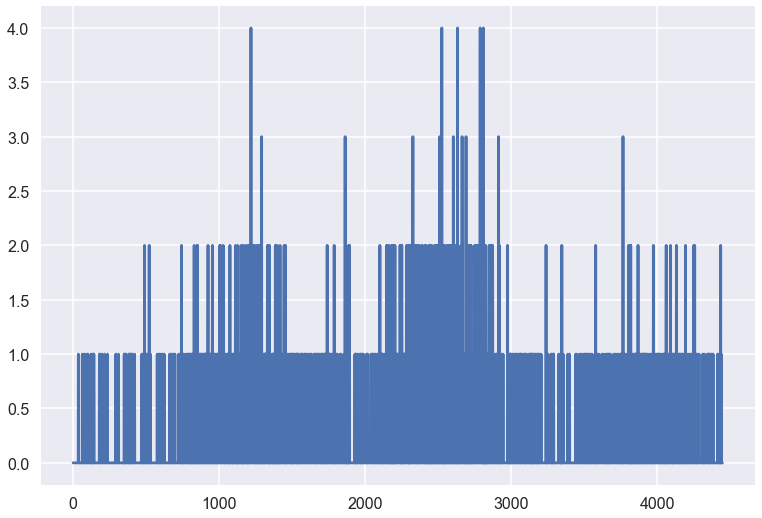

In [53]:
plt.plot(event_data[2].Y__tn[:,2])

In [ ]:
rcParams['figure.figsize'] = 20, 10

In [ ]:
print('Legend  \n___________________ '), 
print("""
Cahed absent – pink #ffeeee
Cached prsent – red #ff9999
Ordinary absent – light blue #eeeeff
Ordinary present - Purple #9999ff 
Method – light green #aaccaa'""")
m.plot_cache_graph(filename = 'plotit.png')
Image("plotit.png")

In [ ]:
inv_idxs

In [111]:
# %load A2_fit_CG.py
# modules
from helpers import *
import attention
reload(attention)
from attention import *
import pop 
log = np.log
# core data
from IPython.core.debugger import Tracer
#if not locals().has_key('event_data'):
#    event_data = cPickle.load(open('data/event_data.pickle'))

#event_data[1].load_attribute('C')
"""
=======
classes
=======
"""

def logdet(X):
    """ Log determinant of a matrix. """
    return np.linalg.slogdet(X)[1]



class PopData( pop.PopData ):                                                                            
    
    def __init__( self, X, Y ):
        super( PopData, self ).__init__( X, Y, add_constant=False )

        
class PopSolver( pop.Factorial_k, pop.Lowpass_s, pop.ML_w, pop.PopSimple ):
    
    _k_solver_class = MopSolver

    @property
    def _max_len_h_star( self ):
        return min([ 1000, self.data.T ])
    
    @cached
    def training_idxs( data ):
        return np.isfinite( data.Y ).all( axis=1 )
    
    @cached
    def has_testing_regions():
        return False
    
    @cached
    def T_training( training_idxs ):
        return training_idxs.sum()
    
    @cached
    def T_testing():
        return 0
    
    def _slice_by_testing( self, sig ):
        return A([])
    
    def _slice_by_training( self, sig ):
        return sig[ self.training_idxs, ... ]
    
    def _zero_during_testing( self, sig ):
        sig = sig.copy()
        sig[ ~self.training_idxs, ... ] = 0
        return sig


"""
==========
how to fit
==========
"""

def fit_CG( d_idx, check=False ):
    """ Fit S_global__tn on top of C__sn """
    # get cell
    d = event_data[ d_idx ]
    # is it done
    attr = 'CG'
    if check:
        return d.can_load_attribute( attr )
    if d.can_load_attribute( attr ):
        print '- already done'
        return
    # group together responses to a single trial
    d2 = d.group_by_trial
    # trial times
    t_ms = d2.event_t_msec
    min_dt = float( np.diff( t_ms ).min() )
    t_idx = np.floor( (t_ms - t_ms.min()) / min_dt ).astype(int)
    # how long is the signal
    T0 = T = t_idx.max() + 1
    T2 = int( pow(2, np.ceil(np.log2(T/2.))) ) * 2
    T3 = int( pow(2, np.ceil(np.log2(T/3.))) ) * 3
    T5 = int( pow(2, np.ceil(np.log2(T/5.))) ) * 5
    T = min(T2, T3, T5)
    # assemble spike counts
    Y__tn = d2.mean_counts_per_event.T
    # padded spike counts
    Y_padded__tn = np.zeros((T, d.N_units)) * np.nan
    Y_padded__tn[ t_idx, : ] = Y__tn
    Y__tn = Y_padded__tn
    # stimulus matrix
    X__ti = np.zeros((T, 2))
    X__ti[ t_idx[ d2.is_trial_cue_L ], 0 ] = 1
    X__ti[ t_idx[ d2.is_trial_cue_R ], 1 ] = 1
    # regression: initial conditions
    K__i = d.C.C__sn.T.flatten()
    K__i[ ~np.isfinite(K__i) ] = -3
    # initial weights
    w__n = np.ones( d.N_units )
    # remove any dodgy cells
    tok__n = (d.Y__tn.mean(axis=0) > 0.01)
    if ~tok__n.all():
        Y__tn = Y__tn[ :, tok__n ]
        w__n = w__n[ tok__n ]
        K__i = d.C.C__sn[ :, tok__n ].T.flatten()
        K__i[ ~np.isfinite(K__i) ] = -3
    # construct model data
    #Tracer()()
    model_data = PopData( X__ti, Y__tn )
    # build model
    initial_conditions = { 'k': K__i, 'theta_s':[-7, 10], 's':np.zeros(T), 'w':w__n }
    model = PopSolver( model_data, initial_conditions=initial_conditions, rank=1 )
    model._grid_search_theta_s_parameters['bounds'] = [[-9, -4], [-40, 20]]
    model._bounds_s = [(-9, -4), (-60, 40)]
    # re-estimate cue conditions
    model.calc_posterior_k()
    for ks in model.k_solvers:
        if np.abs(np.diff(ks.k_vec))[0] > 1:
            ks.k_vec = np.max(ks.k_vec) * A([1, 1])
            ks.calc_posterior_k()
    model.calc_posterior_k()
    # solve for slow drift
    model.solve( verbose=2 )
    clear_output()
    # extract slow global signal
    SG__tn = model.posterior_sw.H__sw[ model.training_idxs, : ]
    # make the right shape
    #Tracer()()
    trials, idxs, inv_idxs = np.unique( d.trial_idxs, return_inverse=True, return_index=True )
    SG__tn = SG__tn[ inv_idxs, : ]
    # check that it is not degenerate
    #w__n = np.abs( svd( SG__tn - SG__tn.mean(axis=0)[na, :], full_matrices=False )[2][0, :].T )
    #N_sig = (w__n > (w__n.max() / 10)).sum()
    #if N_sig < 5:
    #    SG__tn *= 0
    #    print '**** DEGENERATE ****'
    #    #Tracer()()
    if ~tok__n.all():
        S = SG__tn
        SG__tn = np.zeros( (S.shape[0], len(tok__n)) )
        SG__tn[ :, tok__n ] = S
    # done
    if d.can_load_attribute( attr ):
        print '- already done'
        return
    # save
    d.CG = Bunch(d.C.copy())
    d.CG['SG__tn'] = SG__tn
    d.CG = BaseModel( d.CG )
    d.save_attribute(attr)
    return model_data, model

"""
====
jobs
====

# job list
jobs = []
#for d_idx in range(1):
jobs.append( (fit_CG, 1) )

# check all the jobs
checked_jobs = []
for job in progress.dots( jobs, 'checking if jobs are done' ):
    func = job[0]
    args = tuple([ a for a in job[1:] ])
    if not func( *args, check=True ):
        checked_jobs.append(job)
print '%d jobs to do out of %d' % (len(checked_jobs), len(jobs))
jobs = checked_jobs
#
if __name__ == '__main__':
    # run
    print ' '
    print ' '
    randomised_jobs = [ jobs[i] for i in np.random.permutation(len(jobs)) ]
    for job in progress.numbers( randomised_jobs ):
        func = job[0]
        args = tuple([ a for a in job[1:] ])
        func( *args )
#        print ' '
#        print ' '
"""

m_d, m = fit_CG(1)

'\nplt.figure(1)\nd2 =  d.group_by_trial\n#plt.plot(d2.spike_counts.T)\nplt.plot(d2.mean_counts_per_event[0,:])\nsns.despine(trim =20)\n\n#print(np.unique(d.trial_idxs))\nprint(d.N_block_idxs)\nd2.spike_counts.shape\n\n\nmin_dt = float( np.diff( t_ms ).min() )\nt_idx = np.floor( (t_ms - t_ms.min()) / min_dt ).astype(int)\nx = np.linspace((t_ms/1000).min(),(t_ms/1000).max(),8)\n#t_ms.shape\n'

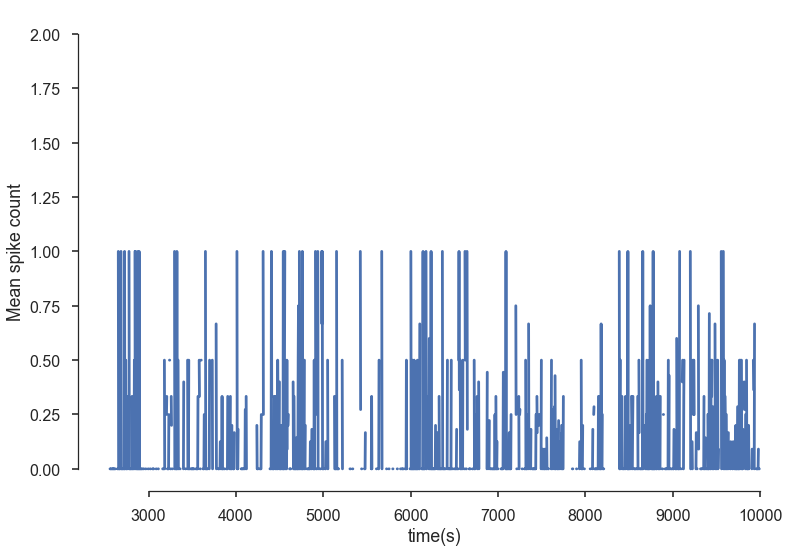

In [62]:
d2 = d.group_by_trial
t_ms = d2.event_t_msec
x = np.linspace((t_ms/1000).min(),(t_ms/1000).max(),m_d.Y[:,0].shape[0])
sns.set_style('ticks')
plt.figure(0)
plt.plot(x,m_d.Y[:,0],'-')
sns.despine(trim =20)
plt.xlabel('time(s)')
plt.ylabel('Mean spike count')
#plt.savefig('Figures/PaddedSpikeCounts.png', format='png', dpi=500)
"""
plt.figure(1)
d2 =  d.group_by_trial
#plt.plot(d2.spike_counts.T)
plt.plot(d2.mean_counts_per_event[0,:])
sns.despine(trim =20)

#print(np.unique(d.trial_idxs))
print(d.N_block_idxs)
d2.spike_counts.shape


min_dt = float( np.diff( t_ms ).min() )
t_idx = np.floor( (t_ms - t_ms.min()) / min_dt ).astype(int)
x = np.linspace((t_ms/1000).min(),(t_ms/1000).max(),8)
#t_ms.shape
"""
#(~np.isnan(m_d.Y[:,0])).sum()

In [ ]:


print('Legend  \n___________________ '), 
print("""
Cahed absent – pink #ffeeee
Cached prsent – red #ff9999
Ordinary absent – light blue #eeeeff
Ordinary present - Purple #9999ff 
Method – light green #aaccaa'""")
m.plot_cache_graph(filename = 'plotit.png')
Image("plotit.png")

(array([  2.,   9.,   6.,  15.,  13.,   7.,   4.,   1.,   2.,   2.]),
 array([-1.93078995, -1.49604249, -1.06129503, -0.62654756, -0.1918001 ,
         0.24294736,  0.67769483,  1.11244229,  1.54718975,  1.98193722,
         2.41668468]),
 <a list of 10 Patch objects>)

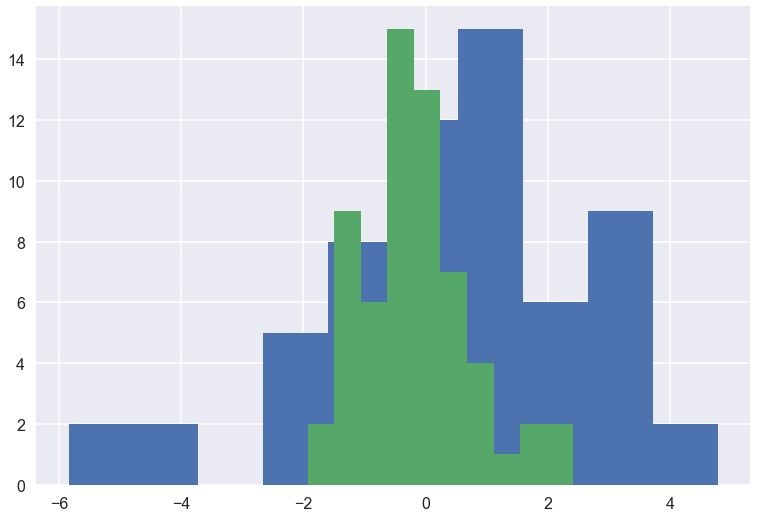

In [56]:
plt.hist(m.W)
plt.hist(G['v'])

mean slow drift sim 0.0458850028828
mean slow drift leanred 0.0916913524398


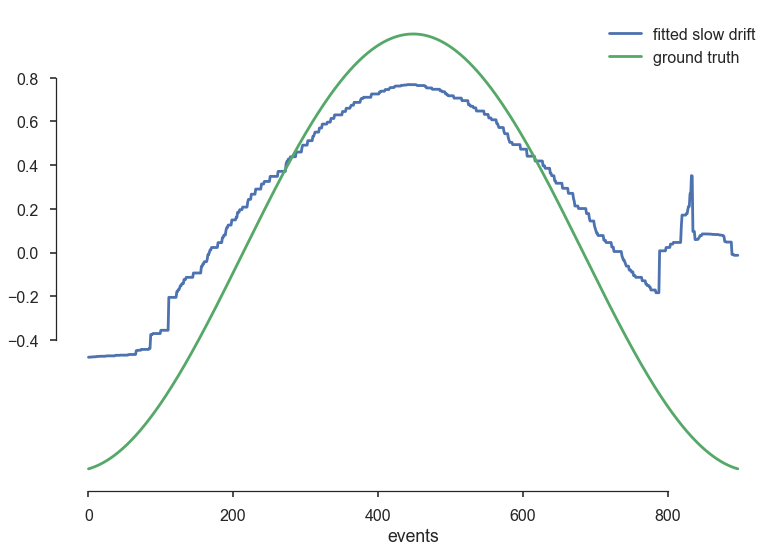

In [113]:
m.posterior_sw.H__sw.shape
trials, idxs, inv_idxs = np.unique( d.trial_idxs, return_inverse=True, return_index=True )
plt.plot(m.posterior_sw.S[m.training_idxs][inv_idxs],label = 'fitted slow drift')
plt.xlabel('events')
sns.despine(trim =20)
plt.plot((G['wave2']),label = 'ground truth')

plt.legend()

print('mean slow drift sim %s'%(np.mean((G['wave2']))))
#print('mean slow drift leanred %s'%(np.mean(m.posterior_sw.S[m.training_idxs][inv_idxs])))
print('mean slow drift leanred %s'%(np.mean(m.posterior_sw.S)))

#plt.savefig('Figures/FittedDrift.png', format='png', dpi=500)

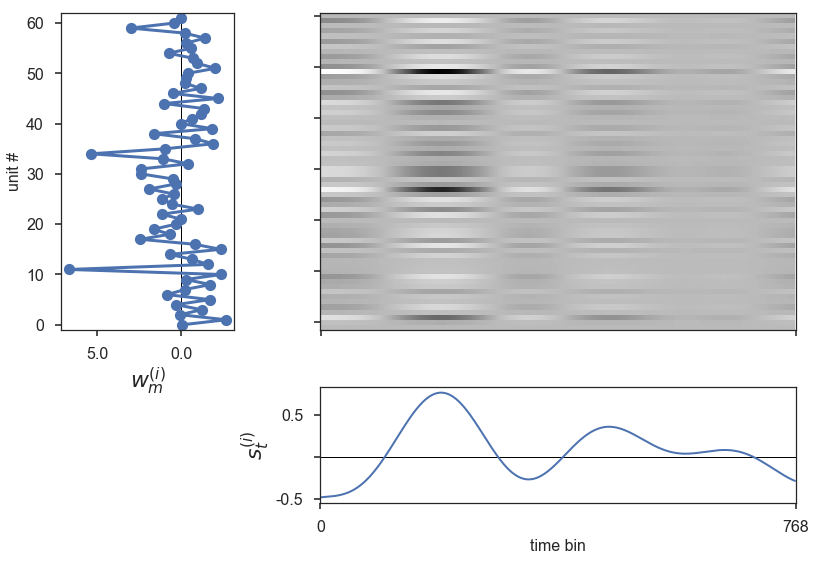

In [112]:
m_d.plot_H(m.posterior_sw.S,m.W)

In [ ]:
#m.LL_testing__sw#LL_testing_per_observation__sw()
d.CG.C__sn

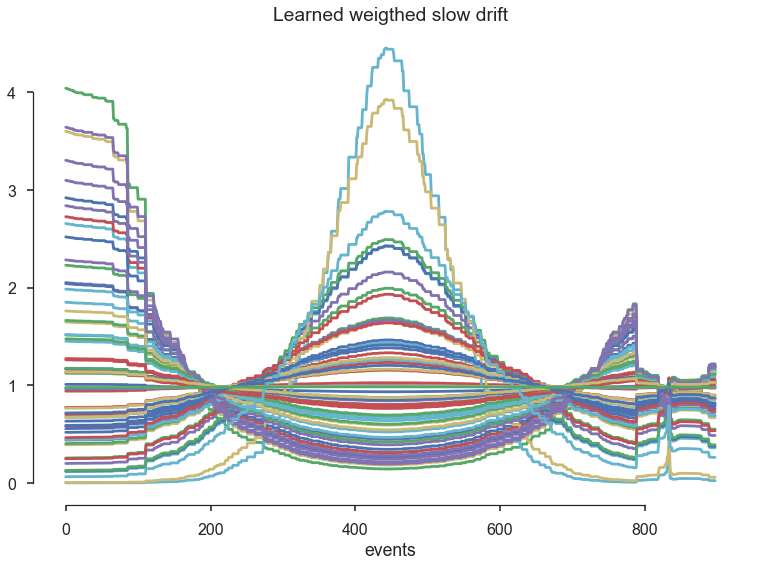

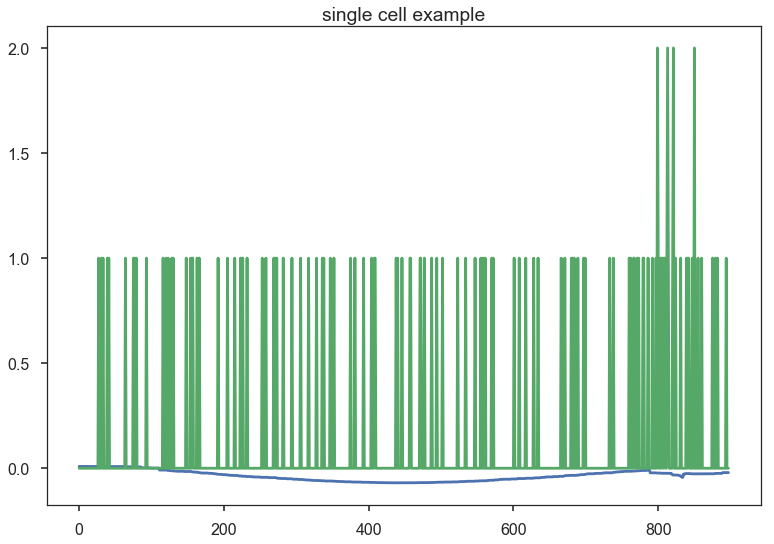

In [114]:
#print("""Original slow wave weights: %s \n 
#Leanred weights %s"""%(m.W.T, G['v']))

plt.figure(0)
plt.title('Learned weigthed slow drift')
for i in range(d.N_units):
    plt.plot(d.CG.G__tn[:,i])
    #plt.plot((G['wave2']),label = 'ground truth')
plt.legend()
plt.xlabel('events')
sns.despine(trim =20)
#plt.savefig('Figures/FittedWeightedDrift.png', format='png', dpi=500)



plt.figure(1)

rcParams['figure.figsize'] = 13,7
plt.title('single cell example')
plt.plot(d.CG.SG__tn[:,0])
plt.plot(d.spike_counts[0,:])

In [ ]:
# %load A3_fit_CGL.py
from attention import * 

#### load event data
#if not locals().has_key('event_data'):
#    event_data = cPickle.load(open('data/event_data.pickle'))

for a in ['CG', 'C']:
    event_data[1].load_attribute(a)

"""
==========
How to fit
==========
"""

#### script

def fit_SL_to_unit( d, unit_idx, include_SG=True ):
    if include_SG:
        d.SG__tn = d.CG.SG__tn
    # group together responses to a single trial
    d2 = d.group_by_trial
    # assemble spike counts
    y__t = d2.mean_counts_per_event[unit_idx, :]
    # trial times
    t_ms =  d2.event_t_msec
    min_dt = float( np.diff( t_ms ).min() )
    t_idx = np.floor( (t_ms - t_ms.min()) / min_dt ).astype(int)
    # how long is the signal
    T = t_idx.max() + 1
    T2 = int( pow(2, np.ceil(np.log2(T))) )                                 
    T3 = int( pow(2, np.ceil(np.log2(T/3.))) ) * 3
    T5 = int( pow(2, np.ceil(np.log2(T/5.))) ) * 5
    T = min(T2, T3, T5)
    # padded spike counts
    y_padded = np.zeros(T) * np.nan
    y_padded[ t_idx ] = y__t
    y__t = y_padded
    # construct stimulus matrix
    if include_SG:
        X__ti = np.zeros((T, 3))
        X__ti[ t_idx, 2 ] = d2.SG__tn[ :, unit_idx ]
    else:
        X__ti = np.zeros((T, 2))
    X__ti[ t_idx[ d2.is_trial_cue_L ], 0 ] = 1
    X__ti[ t_idx[ d2.is_trial_cue_R ], 1 ] = 1
    # construct MopData object
    md = MopData( X__ti, y__t )
    k0 = d.CG.C__sn[:, unit_idx]
    if include_SG:
        k0 = conc([ k0, [1] ])
    # construct solver
    ms = MopSolver( md, initial_conditions={'k':k0, 'theta_h':[-7, 10]} )
    ms.solve(verbose = 0)

    # MAP estimates
    theta_h = ms.posterior_h.theta_h
    k = ms.posterior_k.k_vec
    SL__n = ms.posterior_h.expected_log_g[ ms.training_idxs ]
    #log_FXk = ms.posterior_k.expected_log_FXk[ ms.training_idxs ]

    # reconstruct how to put back in to original dataset
    SL__trial = SL__n.copy()
    SL__event = SL__n[ np.unique( d.trial_idxs, return_inverse=True )[1] ]

    # final data structure
    results = {
            'SL__trial':SL__trial, 'SL__event':SL__event, 
            'k':k, 'theta_h':theta_h, 'ms':ms, 'md':md}
    return results


def fit_CGL( d_idx, check=False ):
    # check
    d = event_data[ d_idx ]
    attr = 'CGL'
    if check:
        return d.can_load_attribute( attr )
    if d.can_load_attribute( attr ):
        print '[already done]'
        return None
    # fit models individually
    results = []
    for i in progress.dots( range(d.N_units), 'fitting SL' ):
        r = fit_SL_to_unit( d, i )
        results.append(r)
        # has it been done already
        if d.can_load_attribute( attr ):
            print '[already done]'
            return None
    # save
    CGL = Bunch( d.CG.copy() )
    CGL['C__sn'] = A([ r['k'][:2] for r in results ]).T
    CGL['SG__tn'] = CGL['SG__tn'] * A([ r['k'][-1] for r in results ])[None, :]
    CGL['SL__tn'] = A([ r['SL__event'] for r in results ]).T
    CGL['theta_h__ni'] = A([ r['theta_h'] for r in results ])
    CGL = BaseModel( CGL )
    setattr( d, attr, CGL )
    d.save_attribute( attr, overwrite=None )

def fit_CL( d_idx, check=False ):
    # check
    d = event_data[ d_idx ]
    attr = 'CL'
    if check:
        return d.can_load_attribute( attr )
    if d.can_load_attribute( attr ):
        print '[already done]'
        return None
    # fit models individually
    results = []
    for i in progress.dots( range(d.N_units), 'fitting SL' ):
        r = fit_SL_to_unit( d, i, include_SG=False )
        results.append(r)
        # has it been done already
        if d.can_load_attribute( attr ):
            print '[already done]'
            return None
    # save
    CL = Bunch( d.C.copy() )
    CL['C__sn'] = A([ r['k'] for r in results ]).T
    CL['SL__tn'] = A([ r['SL__event'] for r in results ]).T
    CL['theta_h__ni'] = A([ r['theta_h'] for r in results ])
    CL = BaseModel( CL )
    setattr( d, attr, CL )
    d.save_attribute( attr, overwrite=None )



"""
====
jobs
====

# job list
jobs = []
#for d_idx in range(1):
d_idx = 1
jobs.append( (fit_CGL, d_idx) )
jobs.append( (fit_CL, d_idx) )

# check all the jobs
checked_jobs = []
for job in progress.dots( jobs, 'checking if jobs are done' ):
    func = job[0]
    args = tuple([ a for a in job[1:] ])
    if not func( *args, check=True ):
        checked_jobs.append(job)
print '%d jobs to do out of %d' % (len(checked_jobs), len(jobs))
jobs = checked_jobs

if __name__ == '__main__':
    # run
    print ' '
    print ' '
    randomised_jobs = [ jobs[i] for i in np.random.permutation(len(jobs)) ]
    for job in progress.numbers( randomised_jobs ):
        func = job[0]
        args = tuple([ a for a in job[1:] ])
        func( *args )
        print ' '
        print ' '
"""

#fit_CL(1) 
#fit_CGL(1) 


In [ ]:
d.CL

In [ ]:
#plt.plot(d.CL.SL__tn)
#What we've fitted so far
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(d.CL.SL__tn[:,i])
    plt.plot(d.CGL.SL__tn[:,i])
    plt.plot(d.spike_counts[i,:],alpha = 0.3)

In [ ]:
G__tn =  d.CGL.G__tn
C__sn = d.CGL.C__sn

s_training = models.Cue( 
        d, tau=1, verbose=False, save_intermediates=True, 
        G__tn=G__tn, C__sn=C__sn,solve=True)

In [ ]:
#s_training.solve_for_next_Z()
a = s_training.intermediate_results

In [ ]:
#plt.plot(s_training.Omega__tn[0:100,1],'-')
U,V,S = svd(a.Omega__tn,full_matrices=False)
#plt.plot(s_training.G__tn)
#plt.plot(s_training.Y__tn)

In [115]:
# %load A6_cv_masks.py
import attention
reload(attention)
from attention import *


use_sim = False

#### load event data
if not locals().has_key('event_data'):
    if use_sim:
        event_data = cPickle.load(open('data/sim_event_data.v2.pickle'))
        N_reps = 10
    else:
        event_data = cPickle.load(open('data/event_data.pickle'))
        N_reps = 50

N_reps = 50

"""
=================
Setting up for CV
=================
"""

def setup_cv( d, N_reps=N_reps ):

    # values
    cL, cR = d.is_trial_cue_L, d.is_trial_cue_R
    T, M = d.N_events, d.N_units

    # container for masks
    masks = np.zeros((N_reps, M, T), dtype=bool)

    # cycle through repeats
    for rep in progress.dots( range(N_reps) ):

        # separate into training and testing
        mask = np.zeros((M, T), dtype=bool)
        for t in range(T):
            mask[ perm( M )[:M*0.2], t ] = True

        # save mask
        masks[rep, :, :] = mask

        # is this done already
        try:
            d.load_attribute('cv_masks__int')
            print '[already done]'
            return None
        except IOError:
            pass

    # 10reps fix
    if d.can_load_attribute( 'cv_masks_10reps__int' ):
        d.load_attribute('cv_masks_10reps__int')
        masks[ :10, :, : ] = d.cv_masks_10reps__int

    # return
    return masks


########
# batch 
########


#for d in progress.numbers( np.random.permutation( event_data ) ):

try:
    d.load_attribute('cv_masks__int')
except IOError:
    d.cv_masks__int = setup_cv(d)
    if d.cv_masks__int is not None:
        d.save_attribute('cv_masks__int', overwrite=None)


.....ooooo[1s]


In [ ]:
d.__dict__.keys()

In [ ]:
U,V,S = svd(a.Omega__tn,full_matrices=False)
sns.set_context('poster')
U.shape
#V.shape
#S.shape
#plt.plot(U[:,10])
rcParams['figure.figsize'] = 20, 10
plt.figure(0)
print(V)
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.plot(U[:,i],label = V[i])
    plt.legend()
 
plt.figure(1)
   
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.plot(d.Y__tn[:,i],label = i) 
    plt.plot(U[:,0]*10)
    #plt.plot(G['wave'])
    plt.legend()
    
plt.figure(2)    
plt.plot(G['wave'])

plt.plot(U[:,0]*10)

In [125]:
#taus = np.logspace(0, 3, 10).astype(int)
taus = np.array([0.1 ,0.3,0.9,1,2,4]).astype(float)
taus

array([ 0.1,  0.3,  0.9,  1. ,  2. ,  4. ])

In [ ]:
# %load B1_mod_tau.py
from attention import *

"""
=========
Load data
=========
"""

#### load event data
#if not locals().has_key('event_data'):
#    event_data = cPickle.load(open('data/event_data.pickle'))
    #event_data = cPickle.load(open('data/sim_event_data.v3.pickle'))


####################


#taus = np.logspace(0, 3, 10).astype(int)
taus = np.array([0.1, 0.3,0.9,1,2,4]).astype(float)

def partition_d( d ):
    T, M = d.N_events, d.N_units
    d_training = d.__copy__()
    d_testing = d.__copy__()
    d_training.spike_counts = d_training.spike_counts.copy().astype(float)
    d_testing.spike_counts = d_testing.spike_counts.copy().astype(float)
    mask = np.zeros((M, T), dtype=bool)
    for t in range(T):
        mask[ perm( M )[:M*0.2], t ] = True
    d_training.spike_counts[ mask ] = np.nan
    d_testing.spike_counts[ ~mask ] = np.nan
    return d_training, d_testing


def calc_best_tau( d, attr_to_check, base_model='CGL', mod_model='cue', N_reps=40, 
        preload_LLs=None, **kw ):
    # load stuff for base_model
    if base_model not in ['CGL', 'CG', 'CL', 'C']:
        raise ValueError('unknown base_model')
    d.load_attribute(base_model)
    G__tn = getattr( d, base_model ).G__tn
    C__sn = getattr( d, base_model ).C__sn

    # containers
    LLs = Bunch({})
    if preload_LLs is None:
        for tau in taus:
            LLs[tau] = []
    else:
        # convert back into lists
        for tau in taus:
            LLs[tau] = [l for l in preload_LLs[tau]]
        # don't have to do as many
        N_reps_done = len( preload_LLs.values()[0] )
        N_reps = N_reps - N_reps_done

    # run through
    for _ in progress.numbers( range(N_reps), key = lambda i: 'iteration %d' % i ):
        # partition
        d_training, d_testing = partition_d( d )
        # fit model
        if mod_model == 'cue':
            ModModel = models.Cue
        elif mod_model == 'naive':
            ModModel = models.Naive
        else:
            raise ValueError('unknown mod_model')
        s_training = ModModel( 
                d_training, tau=taus, verbose=False, save_intermediates=True, 
                G__tn=G__tn, C__sn=C__sn, **kw )
        # cross validate
        s_testing = ModModel(
                d_testing, tau=taus, verbose=False, solve=False, 
                G__tn=G__tn, C__sn=C__sn, **kw )
        # check all the tausW
        for tau in taus:
            results = s_training.intermediate_results[ tau ]
            if mod_model == 'naive':
                s_testing.a__n = results.a__n
            elif mod_model == 'cue':
                s_testing.C__sn = results.C__sn
            else:
                raise ValueError('unknown mod_model')
            s_testing.Z__tn = results.Omega__tn
            s_testing.Omega__tn = results.Omega__tn
            LLs[tau].append( s_testing.LL_per_obs )
            # check if we're done
            try:
                d.load_attribute( attr_to_check )
                print '[already done]'
                return None
            except IOError:
                pass
    # package and return
    for tau in taus:
        LLs[tau] = A( LLs[tau] )
    return LLs



#################################
# functions for cross validation
#################################

def announce( d, attr ):
    s = '%s:  %s' % ( attr, d.__repr__() )
    print '='*len(s)
    print s
    print '='*len(s)
    
def f_general( d_idx, base_model, mod_model, rank, check=False, **kw ):
    if mod_model == 'cue':
        attr = 'tau_%sM_%d' % (base_model, rank)
    elif mod_model == 'naive':
        attr = 'tau_%sN_%d' % (base_model, rank)
    else:
        raise ValueError('unknown mod_model')
    d = event_data[ d_idx ]
    if check:
        return d.can_load_attribute(attr)
    announce( d, attr )
    try:
        d.load_attribute( attr )
    except IOError:
        # preload
        preload_attr = attr.replace('tau_', 'tau_10reps_')
        if d.can_load_attribute( preload_attr ):
            d.load_attribute(preload_attr)
            preload_LLs = getattr( d, preload_attr ).LLs
        else:
            preload_LLs = None
        # fit rest
        tau_kw = {'base_model':base_model, 'rank':rank, 'mod_model':mod_model}
        tau_kw.update( **kw )
        results = calc_best_tau( d, attr, preload_LLs=preload_LLs, **tau_kw ) ##!!
        if (results is not None):
            t = Bunch({'LLs':results})
            t.tau = taus[ A([ np.median(results[tau]) for tau in taus ]).argmax() ]
            setattr( d, attr, t )
            d.save_attribute( attr, overwrite=None )

def f_hemi_general( d_idx, base_model, mod_model, rank, check=False, **kw ):
    if mod_model == 'cue':
        attr = 'tau_%sM_h%d' % (base_model, rank)
    elif mod_model == 'naive':
        attr = 'tau_%sN_h%d' % (base_model, rank)
    else:
        raise ValueError('unknown mod_model')
    d = event_data[ d_idx ]
    if check:
        return d.can_load_attribute(attr)
    announce( d, attr )
    try:
        d.load_attribute( attr )
    except IOError:
        # preload
        preload_attr = attr.replace('tau_', 'tau_10reps_')
        if d.can_load_attribute( preload_attr ):
            d.load_attribute(preload_attr)
            preload_LLs = getattr( d, preload_attr )
        else:
            preload_LLs = Bunch({'LLs_L':None, 'LLs_R':None})
        # fit rest
        dL, dR = d.filter_rf_L, d.filter_rf_R
        tau_kw = {'base_model':base_model, 'rank':rank, 'mod_model':mod_model}
        tau_kw.update( **kw )
        print 'fitting L'
        results_L = calc_best_tau( dL, attr, preload_LLs=preload_LLs.LLs_L, **tau_kw )
        print 'fitting R'
        results_R = calc_best_tau( dR, attr, preload_LLs=preload_LLs.LLs_R, **tau_kw )
        if (results_L is not None) and (results_R is not None):
            t = Bunch({'LLs_L':results_L, 'LLs_R':results_R})
            t.tau_L = taus[ A([ np.median(results_L[tau]) for tau in taus ]).argmax() ]
            t.tau_R = taus[ A([ np.median(results_R[tau]) for tau in taus ]).argmax() ]
            setattr( d, attr, t )
            d.save_attribute( attr, overwrite=None )



"""
====
jobs
====


jobs = []
#for d_idx in range( len(event_data) ):
d_idx = 1
for base_model in ['CG', 'CGL']:
    for rank in range(1, 11):
        jobs.append( (f_general, d_idx, base_model, 'cue', rank) )
    for rank in range(1, 6):
        jobs.append( (f_hemi_general, d_idx, base_model, 'cue', rank) )
"""
"""
# cue models
jobs = []
for d_idx in range( len(event_data) ):
    for base_model in ['CGL', 'CG', 'CL', 'C']:
        for rank in range(1, 6):
            jobs.append( (f_general, d_idx, base_model, 'cue', rank) )
            jobs.append( (f_hemi_general, d_idx, base_model, 'cue', rank) )

# naive models
for d_idx in range( len(event_data) ):
    for base_model in ['CGL']:
        for rank in range(1, 6):
            jobs.append( (f_general, d_idx, base_model, 'naive', rank) )
            jobs.append( (f_hemi_general, d_idx, base_model, 'naive', rank) )

# models for sim data
if event_data[0].prefix.startswith('sim'):
    jobs = []
    for d_idx in range( len(event_data) ):
        for base_model in ['CGL']:
            for rank in range(1, 11):
                jobs.append( (f_general, d_idx, base_model, 'cue', rank) )

# models for sim v3 data
if event_data[0].prefix.startswith('sim_v3'):
    jobs = []
    target_ranks = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 16, 24, 32]
    for d_idx in [0]: #range( len(event_data) ):
        for base_model in ['CGL']:
            for rank in target_ranks:
                jobs.append( (f_general, d_idx, base_model, 'cue', rank) )


# check all the jobs
checked_jobs = []
for job in progress.dots( jobs, 'checking if jobs are done' ):
    func = job[0]
    args = tuple([ a for a in job[1:] ])
    if not func( *args, check=True ):
        checked_jobs.append(job)
print '%d jobs to do out of %d' % (len(checked_jobs), len(jobs))
jobs = checked_jobs

if __name__ == '__main__':
    # run
    print ' '
    print ' '
    randomised_jobs = [ jobs[i] for i in np.random.permutation(len(jobs)) ]
    for job in progress.numbers( randomised_jobs ):
        func = job[0]
        args = tuple([ a for a in job[1:] ])
        func( *args )
        print ' '
        print ' '
"""
#f_general(1,'CGL','cue',rank=1)
for i in range(1,4):
    f_general(1,'CG','cue',rank=i) 
        

tau_CGM_1:  <EventData 'djor803072': 62 units / 898 events>
[0/39] iteration 0
[1/39] iteration 1
[2/39] iteration 2
[3/39] iteration 3
[4/39] iteration 4
[5/39] iteration 5
[6/39] iteration 6


-0.442143085506


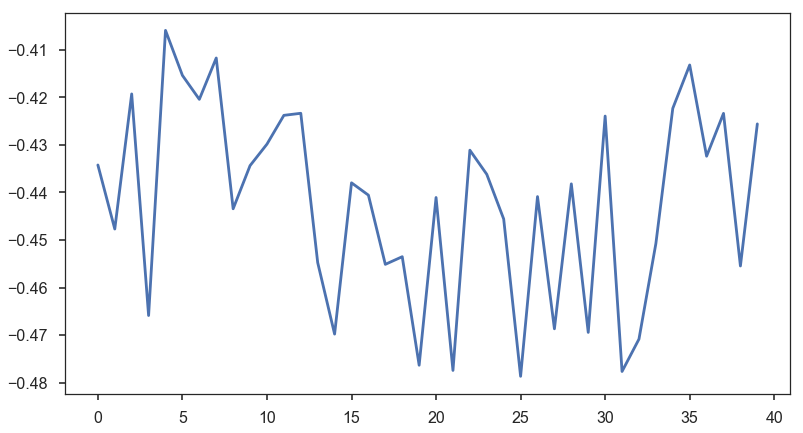

In [117]:
plt.plot(d.tau_CGM_1['LLs'][1])
print(d.tau_CGM_1['LLs'][1].mean())
#plt.plot(d.tau_CGM_2['LLs'][2])
#print(d.tau_CGM_2['LLs'][2].mean())

In [121]:
d.tau_CGM_1['LLs'][0.29999999999999999].shape


(40,)

'\nax = plt.subplot(3,2,2)\ndata= np.zeros([40,len(d.tau_CGM_2[\'LLs\'])])\nfor idx,i in enumerate(d.tau_CGM_2[\'LLs\']):\n    data[:,idx] = d.tau_CGM_2[\'LLs\'][i]\nplt.errorbar(taus,data.mean(axis=0), yerr=data.std(axis=0),fmt=\'o-\',alpha = 0.6 )\nplt.plot(d.tau_CGM_2.tau,np.median(d.tau_CGM_2[\'LLs\'][d.tau_CGM_2.tau]),\'ro\',label = \'best tau\')    \n#ax =sns.tsplot(time=taus,data=data)\nax.set_xlabel(\'tau\')\nax.set_xscale("log", nonposx=\'clip\')\nplt.xticks(taus)\nax.set_xticklabels(taus)\nsns.despine(trim =20)\nplt.title(\'rank 2\')\nplt.tight_layout()\n#ax.legend()\n\nax = plt.subplot(3,2,3)\ndata= np.zeros([40,len(d.tau_CGM_3[\'LLs\'])])\nfor idx,i in enumerate(d.tau_CGM_3[\'LLs\']):\n    data[:,idx] = d.tau_CGM_3[\'LLs\'][i]\nplt.errorbar(taus,data.mean(axis=0), yerr=data.std(axis=0),fmt=\'o-\',alpha = 0.6 )\nplt.plot(d.tau_CGM_3.tau,np.median(d.tau_CGM_3[\'LLs\'][d.tau_CGM_3.tau]),\'ro\',label = \'best tau\')    \n#ax =sns.tsplot(time=taus,value=\'LL per obs\',data=data)

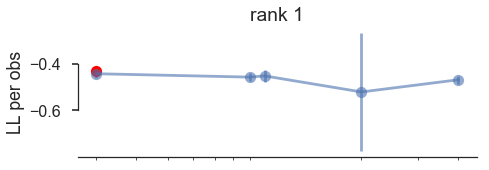

In [122]:
ax = plt.subplot(3,2,1)
data= np.zeros([40,len(d.tau_CGM_1['LLs'])])
for idx,i in enumerate(d.tau_CGM_1['LLs']):
    data[:,idx] = d.tau_CGM_1['LLs'][i]
#plt.plot(d.tau_CGM_1.tau,np.median(d.tau_CGM_1['LLs'][d.tau_CGM_1.tau]),'ro',label = 'best tau')    
#ax =sns.tsplot(time=taus,value='LL per obs',data=data)
plt.errorbar(taus,data.mean(axis=0), yerr=data.std(axis=0),fmt='o-',alpha = 0.6 )
plt.plot(d.tau_CGM_1.tau,np.median(d.tau_CGM_1['LLs'][d.tau_CGM_1.tau]),'ro',label = 'best tau')    

ax.set_xscale("log", nonposx='clip')
plt.ylabel('LL per obs')
plt.xticks([])
sns.despine(trim =20)
plt.title('rank 1')
plt.tight_layout()
#ax.set_xticklabels(taus)

#ax.legend()
"""
ax = plt.subplot(3,2,2)
data= np.zeros([40,len(d.tau_CGM_2['LLs'])])
for idx,i in enumerate(d.tau_CGM_2['LLs']):
    data[:,idx] = d.tau_CGM_2['LLs'][i]
plt.errorbar(taus,data.mean(axis=0), yerr=data.std(axis=0),fmt='o-',alpha = 0.6 )
plt.plot(d.tau_CGM_2.tau,np.median(d.tau_CGM_2['LLs'][d.tau_CGM_2.tau]),'ro',label = 'best tau')    
#ax =sns.tsplot(time=taus,data=data)
ax.set_xlabel('tau')
ax.set_xscale("log", nonposx='clip')
plt.xticks(taus)
ax.set_xticklabels(taus)
sns.despine(trim =20)
plt.title('rank 2')
plt.tight_layout()
#ax.legend()

ax = plt.subplot(3,2,3)
data= np.zeros([40,len(d.tau_CGM_3['LLs'])])
for idx,i in enumerate(d.tau_CGM_3['LLs']):
    data[:,idx] = d.tau_CGM_3['LLs'][i]
plt.errorbar(taus,data.mean(axis=0), yerr=data.std(axis=0),fmt='o-',alpha = 0.6 )
plt.plot(d.tau_CGM_3.tau,np.median(d.tau_CGM_3['LLs'][d.tau_CGM_3.tau]),'ro',label = 'best tau')    
#ax =sns.tsplot(time=taus,value='LL per obs',data=data)
plt.title('rank 3')
ax.set_xlabel('tau')
ax.set_xscale("log", nonposx='clip')
plt.ylabel('LL per obs')
plt.xticks(taus)
ax.set_xticklabels(taus)
sns.despine(trim =20)
ax.legend()
plt.tight_layout()
"""

In [89]:
taus

array([ 0,  0,  0,  1,  2,  4, 10])

In [ ]:
taus = np.logspace(0, 3, 10).astype(int)
bb =  A([ np.median(d.tau_CGLM_1['LLs'][tau]) for tau in taus ])

In [ ]:
bb.argmax()

In [ ]:
len(d.tau_CGLM_1['LLs'])

In [ ]:
# %load B2_mod_fit.py
import attention
reload(attention)
from attention import *


"""
=========
Load data
=========
"""

#### load event data
#if not locals().has_key('event_data'):
#    event_data = cPickle.load(open('data/event_data.pickle'))
    #event_data = cPickle.load(open('data/sim_event_data.pickle'))


####################


def fit_naive( d, attr_to_check, **kw ):
    announce( d, attr_to_check )
    if attr_to_check in d.available_attributes:
        print '[already done]'
        return None
    results = d.solve_naive( **kw )
    if attr_to_check in d.available_attributes:
        print '[already done]'
        return None
    return results

def fit_naive_hemi( d, attr_to_check, **kw ):
    announce( d, attr_to_check )
    if attr_to_check in d.available_attributes:
        print '[already done]'
        return None
    results = d.solve_naive_hemi( **kw )
    if attr_to_check in d.available_attributes:
        print '[already done]'
        return None
    return results

def fit_cue( d, attr_to_check, **kw ):
    announce( d, attr_to_check )
    if attr_to_check in d.available_attributes:
        print '[already done]'
        return None
    results = d.solve_cue( **kw )
    if attr_to_check in d.available_attributes:
        print '[already done]'
        return None
    return results

def fit_cue_hemi( d, attr_to_check, **kw ):
    announce( d, attr_to_check )
    if attr_to_check in d.available_attributes:
        print '[already done]'
        return None
    results = d.solve_cue_hemi( **kw )
    if attr_to_check in d.available_attributes:
        print '[already done]'
        return None
    return results

def announce( d, attr ):
    print '================================='
    print '%s:  %s' % ( attr, d.__repr__() )
    print '================================='
    
# fitting functions

def f_general( d_idx, rank, base_model, mod_model, check=False ):
    # attribute and recording
    if mod_model == 'cue':
        attr = '%sM_%d' % (base_model, rank)
    elif mod_model == 'naive':
        attr = '%sN_%d' % (base_model, rank)
    d = event_data[ d_idx ]
    if check:
        return d.can_load_attribute( attr )
    # get tau
    tau_attr = 'tau_%s' % attr
    d.load_attribute( tau_attr )
    tau = getattr( d, tau_attr ).tau
    # get base model
    d.load_attribute(base_model)
    G__tn = getattr( d, base_model ).G__tn
    C__sn = getattr( d, base_model ).C__sn
    # fit
    fit_kw = {'tau':tau, 'rank':rank, 'nonlinearity':'exp', 
            'verbose':False, 'G__tn':G__tn, 'C__sn':C__sn }
    if mod_model == 'cue':
        results = fit_cue( d, attr, **fit_kw )
    elif mod_model == 'naive':
        results = fit_naive( d, attr, **fit_kw )
    else:
        raise ValueError('unknown mod_model')
    # save
    if results is not None:
        setattr( d, attr, results )
        d.save_attribute( attr, overwrite=None )

# exponential nonlinearity, hemi

def f_hemi_general( d_idx, rank, base_model, mod_model, check=False ):
    # attribute and recording
    if mod_model == 'cue':
        attr = '%sM_h%d' % (base_model, rank)
    elif mod_model == 'naive':
        attr = '%sN_h%d' % (base_model, rank)
    else:
        raise ValueError('unknown mod_model')
    d = event_data[ d_idx ]
    if check:
        return d.can_load_attribute( attr )
    # get tau
    tau_attr = 'tau_%s' % attr
    d.load_attribute( tau_attr )
    tau_L = getattr( d, tau_attr ).tau_L
    tau_R = getattr( d, tau_attr ).tau_R
    # get base model
    d.load_attribute( base_model )
    G__tn = getattr( d, base_model ).G__tn
    C__sn = getattr( d, base_model ).C__sn
    # fit
    fit_kw = {'tau_L':tau_L, 'tau_R':tau_R, 'rank':rank, 'nonlinearity':'exp', 
            'verbose':False, 'G__tn':G__tn, 'C__sn':C__sn }
    if mod_model == 'cue':
        results = fit_cue_hemi( d, attr, **fit_kw )
    elif mod_model == 'naive':
        results = fit_naive_hemi( d, attr, **fit_kw )
    else:
        raise ValueError('unknown mod_model')
    # save
    if results is not None:
        setattr( d, attr, results )
        d.save_attribute( attr, overwrite=None )



"""
====
jobs
====


# cue models
jobs = []
d_idx = 1
for func in [f_general, f_hemi_general]:
    #for d_idx in range( len(event_data) ):
    for i in range(1, 6):
        for base_model in ['CGL', 'CG' ]: #, 'CL', 'C'
            jobs.append((func, d_idx, i, base_model, 'cue'))

# naive models
#for func in [f_general, f_hemi_general]:
#    #for d_idx in range( len(event_data) ):
#    for i in range(1, 6):
#        for base_model in ['CGL']:
#            jobs.append((func, d_idx, i, base_model, 'naive'))

# models for sim data
#if event_data[0].prefix.startswith('sim'):
#    jobs = []
#    for func in [f_general]:
#        #for d_idx in range( len(event_data) ):
#        for i in range(1, 11):
#            for base_model in ['CGL']:
#                jobs.append((func, d_idx, i, base_model, 'cue'))


# check all the jobs
checked_jobs = []
for job in progress.dots( jobs, 'checking if jobs are done' ):
    func = job[0]
    args = tuple([ a for a in job[1:] ])
    if not func( *args, check=True ):
        checked_jobs.append(job)
print '%d jobs to do out of %d' % (len(checked_jobs), len(jobs))
jobs = checked_jobs

if __name__ == '__main__':
    # run
    print ' '
    print ' '
    randomised_jobs = [ jobs[i] for i in np.random.permutation(len(jobs)) ]
    for job in progress.numbers( randomised_jobs ):
        func = job[0]
        args = tuple([ a for a in job[1:] ])
        func( *args )
        print ' '
        print ' '
"""

#f_general(1,1,'CGL','cue')  
for rank in range(1,4):
    f_general(1,rank,'CG','cue')  

In [ ]:

#plt.plot(d.CL.SL__tn)
#What we've fitted so far
t = range(400,700)
#rcParams['figure.figsize'] = 20, 10
sns.set_context('poster')
#for i in range(5):
i =10
#plt.subplot(1,i+1)
#plt.plot(d.CG.SL__tn[:,i][t])
plt.plot(d.CG.SG__tn[:,i][t],label = 'learned slow drift')
plt.plot(d.spike_counts[i,:][t],alpha = 0.2,label = 'spike counts')
plt.plot(d.CGM_1.Omega__tn[:,i][t],'.-',label ='Learned fast modulator')
#plt.plot()
plt.plot(G['wave'][t,na].dot(G['w'][na,:])[:,i],'-',alpha = 0.3,label = 'ground truth fast modulator')
plt.ylabel('spike counts')
plt.xlabel('time')
plt.legend()
#plt.xticks(taus)
#ax.set_xticklabels(taus)
sns.despine(trim =20)
#plt.savefig('Figures/FittedFastMod.png', format='png', dpi=500)
#print(d.CGLM_1.LLs)

In [ ]:
d.CGLM_1.LL_per_obs

In [ ]:
d.C.


In [ ]:
M = G['wave'][:,na].dot(G['w'][:,na].T)

In [ ]:
U,V,S = svd(d.CGM_1.Omega__tn,full_matrices=False)
sns.set_style('ticks')
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("poster")#, font_scale=1.5, rc={"lines.linewidth": 2.5})
#V.shape
#S.shape
#plt.plot(U[:,10])

plt.figure(0)
#plt.suptitle("SVD rank 1", fontsize=14)
#plt.tight_layout()
plt.title('rank 1')
#print(V)
for idx,i in enumerate(range(1,6,2)):
    ax = plt.subplot(6,2,i)
    plt.plot(U[:,idx],label = V[idx])
    plt.title('rank 1, SV %s'%(V[idx]),fontsize = 14)
    #plt.legend()
    sns.despine(trim =20,left = True)
    plt.tight_layout()
    plt.yticks([])
    #ax.xaxis.set_visible(False)
U,V,S = svd(d.CGM_2.Omega__tn,full_matrices=False)
#sns.set_style('darkgrid')
#V.shape
#S.shape
#plt.plot(U[:,10])

#plt.figure(1)

#print(V)
#plt.title('rank 2')
for idx,i in enumerate(range(1,7,2)):
    plt.subplot(6,2,i+1)
    plt.title('rank 2, SV %s'%(V[idx]),fontsize = 14)
    plt.plot(U[:,idx],'g',label = V[i])
    #plt.legend()
    sns.despine(trim =20,left = True)
    plt.yticks([])
    plt.tight_layout()
U,V,S = svd(d.CGM_3.Omega__tn,full_matrices=False)

#sns.set_style('darkgrid')
#V.shape
#S.shape
#plt.plot(U[:,10])
#plt.figure(2)
#plt.title('rank 3')
#print(V)
for idx,i in enumerate(range(6,12,2)):
    plt.subplot(6,2,i+1)
    plt.title('rank 3, SV %s'%(V[idx]),fontsize = 14)
    plt.plot(U[:,idx],'k',label = V[idx])
    #plt.legend()
    plt.yticks([])
    sns.despine(trim =20,left = True)
    plt.tight_layout()
    
    
    
    
    
    
"""
plt.figure(1)
t = range(700,800)
for i in range(1):
    plt.subplot(1,1,i+1)
    plt.plot(d.Y__tn[t,i],label = G['w'][i]) 
    plt.plot(d.CGLM_1.Omega__tn[t,i],'.')
    plt.plot(d.CGLM_1.Omega__tn[t,i],'.')
    #plt.plot(M[t,i],'--')
    plt.plot(d.CGL.SG__tn[t,i])
    
    plt.legend()
print()    
sns.despine(offset=10, trim=True);
sns.despine()
#plt.figure(2)    
#plt.plot(G['wave'])
#plt.plot(G['wave2'])
""" 
#plt.plot(U[:,0]*10)

In [ ]:
d.cv_masks__int[0,:,:].shape
T, M = d.N_events, d.N_units
J = int( np.floor(M * 0.2) * T )
Mu__j = np.zeros((N_reps, J))
LL__j = np.zeros(N_reps)
Mu__tn = np.exp( d.S__ts.dot(d.C.C__sn) ) * d.C.G__tn

In [ ]:
print(Mu__tn.shape)
print(mask__nt.T.shape)
a = np.array(mask__nt*1)

In [ ]:
plt.plot(d.cv_masks__int[ 1, :, 1 ])
plt.plot(d.cv_masks__int[ 0, :, 1 ])

In [ ]:
mask__nt = d.cv_masks__int[ 0, :, : ]
Mu__j[0, :] = Mu__tn[ mask__nt.T ]
plt.plot(Mu__j[0,:])

In [ ]:
# %load B3_mod_cv.py
import attention
reload(attention)
from attention import *

from scipy.special import gammaln

def logfactorial(x):
    return gammaln( x+1 )


"""
=========
Load data
=========
"""

use_sim = True
repeat_idx = 15


#### load event data

#if not locals().has_key('event_data'):
#    if use_sim:
#        N_reps = 10
#        event_data = cPickle.load(open('data/sim_event_data.v4.repeat.%d.pickle' % repeat_idx))
#    else:
N_reps = 50
#        event_data = cPickle.load(open('data/event_data.pickle'))


###############

def fit_cv_base( d_idx, base_model, N_reps=N_reps, check=False ):

    # setup
    d = event_data[ d_idx ]
    Mu_attr = 'cv_%s_Mu__j' % base_model
    LL_attr = 'cv_%s_LL' % base_model

    # check
    if check:
        return d.can_load_attribute(LL_attr)

    # announce
    print '================================='
    print '%s:  %s' % ( LL_attr, d.__repr__() )
    print '================================='

    # has this been done already
    if d.can_load_attribute(LL_attr):
        print '[already done]'
        return None

    # get base model
    if base_model != 'Z':
        d.load_attribute( base_model )
        G__tn = getattr( d, base_model ).G__tn
        C__sn = getattr( d, base_model ).C__sn
        S__ts = d.S__ts
    # get masks
    d.load_attribute('cv_masks__int')

    # container for predictions
    T, M = d.N_events, d.N_units
    J = int( np.floor(M * 0.2) * T )
    Mu__j = np.zeros((N_reps, J))
    LL__j = np.zeros(N_reps)

    # predictions
    if base_model == 'Z':
        Mu__tn = np.repeat( np.mean( d.Y__tn, axis=0 )[None, :], T, 0)
    else:
        Mu__tn = np.exp( S__ts.dot(C__sn) ) * G__tn

    # cycle through repeats
    for rep in range(N_reps) :

        mask__nt = d.cv_masks__int[ rep, :, : ]

        # save fits
        Mu__j[rep, :] = Mu__tn[ mask__nt.T ]

        # LL
        Y__j = d.Y__tn[ mask__nt.T ]
        this_LL = -Mu__j[rep, :] + Y__j * np.log(Mu__j[rep, :]) - logfactorial( Y__j )
        this_LL = np.nansum( this_LL ) / np.isfinite(Y__j).sum()
        LL__j[rep] = this_LL

        # is this done already
        if d.can_load_attribute(LL_attr):
            print '[already done]'
            return None

    # save LL
    setattr( d, LL_attr, LL__j )
    d.save_attribute( LL_attr, overwrite=None )
    # save Mu
    """
    if not use_sim:
        setattr( d, Mu_attr, Mu__j )
        d.save_attribute( Mu_attr, overwrite=None )
    """



def fit_cv_mod( d_idx, rank, base_model, mod_model, hemi, N_reps=N_reps, check=False ):

    # setup
    d = event_data[ d_idx ]
    if mod_model == 'cue':
        if hemi:
            infix_attr = '%sM_h%d' % (base_model, rank)
        else:
            infix_attr = '%sM_%d' % (base_model, rank)
    elif mod_model == 'naive':
        if hemi:
            infix_attr = '%sN_h%d' % (base_model, rank)
        else:
            infix_attr = '%sN_%d' % (base_model, rank)
    else:
        raise ValueError('unknown mod_model')
    Mu_attr = 'cv_%s_Mu__j' % infix_attr
    LL_attr = 'cv_%s_LL' % infix_attr
    tau_attr = 'tau_%s' % infix_attr

    # check
    if check:
        return d.can_load_attribute(LL_attr)

    # announce
    print '================================='
    print '%s:  %s' % ( infix_attr, d.__repr__() )
    print '================================='

    # has this been done already
    if d.can_load_attribute(LL_attr):
        print '[already done]'
        return None

    # get tau
    d.load_attribute( tau_attr )
    if hemi:
        tau_L = getattr( d, tau_attr ).tau_L
        tau_R = getattr( d, tau_attr ).tau_R
    else:
        tau = getattr( d, tau_attr ).tau
    # get base model
    d.load_attribute( base_model )
    G__tn = getattr( d, base_model ).G__tn
    C__sn = getattr( d, base_model ).C__sn
    # get masks
    d.load_attribute('cv_masks__int')

    # container for predictions
    T, M = d.N_events, d.N_units
    J = int( np.floor(M * 0.2) * T )
    Mu__j = np.zeros((N_reps, J))
    LL__j = np.zeros(N_reps)
        
    # cycle through repeats
    for rep in progress.numbers( range(N_reps) ):

        # separate into training and testing
        d_training = d.__copy__()
        d_testing = d.__copy__()
        d_training.spike_counts = d_training.spike_counts.copy().astype(float)
        d_testing.spike_counts = d_testing.spike_counts.copy().astype(float)
        mask__nt = d.cv_masks__int[ rep, :, : ]
        d_training.spike_counts[ mask__nt ] = np.nan
        d_testing.spike_counts[ ~mask__nt ] = np.nan

        # fit
        kw = {'nonlinearity':'exp', 'rank':rank, 'verbose':False, 'G__tn':G__tn, 'C__sn':C__sn}
        if mod_model == 'cue':
            if hemi:
                m = d_training.solve_cue_hemi( tau_L=tau_L, tau_R=tau_R, **kw )
                m = m.all
            else:
                m = d_training.solve_cue( tau=tau, **kw )
            # extract
            Mu__tn = (
                    m.S__ts.dot(m.Nu__sn) * G__tn * exp( m.Omega__tn ) )
        
        elif mod_model == 'naive':
            if hemi:
                m = d_training.solve_naive_hemi( tau_L=tau_L, tau_R=tau_R, **kw )
                m = m.all
            else:
                m = d_training.solve_naive( tau=tau, **kw )
            # extract
            Mu__tn = (
                    m.nu__n[None, :] * G__tn * exp( m.Omega__tn ) )


        # save fits
        Mu__j[rep, :] = Mu__tn[ mask__nt.T ]

        # LL
        Y__tn = d_testing.Y__tn
        Y__j = Y__tn[ mask__nt.T ]
        this_LL = (
                -Mu__j[rep, :] 
                + Y__j * np.log(Mu__j[rep, :])
                - logfactorial( Y__j ) )
        this_LL = np.nansum( this_LL ) / np.isfinite(Y__j).sum()
        LL__j[rep] = this_LL

        # is this done already
        if LL_attr in d.available_attributes:
            print '[already done]'
            return None


    # save LL
    setattr( d, LL_attr, LL__j )
    d.save_attribute( LL_attr, overwrite=None )
    # save Mu
    """
    if not use_sim:
        setattr( d, Mu_attr, Mu__j )
        d.save_attribute( Mu_attr, overwrite=None )
    """




#######################
# jobs
#######################

"""
# base models
jobs = []
d_idx =1
#for d_idx in range( len(event_data) ):
for base_model in [  'CG', 'CGL']: #'Z','C',
    jobs.append((fit_cv_base, d_idx, base_model))

# cue models
#for d_idx in range( len(event_data) ):
base_model = 'CG'
for rank in range(1, 11):
    jobs.append( (fit_cv_mod, d_idx, rank, base_model, 'cue', False) )
for rank in range(1, 6):
    jobs.append( (fit_cv_mod, d_idx, rank, base_model, 'cue', True) )
"""
fit_cv_base(1,'Z')
fit_cv_base(1,'C')
fit_cv_base(1,'CG')

for rank in range(1,4):
    fit_cv_mod(1,rank,'CG','cue',False)


In [ ]:
d.__dict__.keys()

In [ ]:
data = zeros([6,50])
data[0,:]= d.cv_Z_LL
data[1,:] = d.cv_C_LL.T
data[2,:] = d.cv_CG_LL.T
data[3,:] = d.cv_CGM_1_LL.T
data[4,:] = d.cv_CGM_2_LL.T
data[5,:] = d.cv_CGM_3_LL.T


In [ ]:
#xx = plt.plot(data.mean(axis=1),'o-')
sns.set_context('poster')
sns.set_style("ticks")
x = [0,1,2,3,4,5]
plt.errorbar(x, data.mean(axis=1), yerr=data.std(axis=1),fmt='o-' )
lables= np.array(['stm','cue','+slow','+1 modulator','+2 modulators ','+3 modulators'])
plt.xticks(x, lables)
sns.despine(offset=10, trim=True)
plt.ylabel('LL')
#plt.xticks('on')
#xx.xticks(np.linspace(0,4,4))
#xx.set_xticklabels(
#xx.legend()



#sns.tsplot(data.T)

In [30]:
#simulate raw data
#sp= sps.bernoulli.rvs(0.8,0,[1000])
sp  = np.random.poisson(1,[10,1000])
s_times = np.linspace(1,1000,1000)
s_times = np.matlib.repmat(s_times,10,1)
s_times[~np.array(sp,dtype = bool)] = 0
t_start = 100
t_end = t_start+60*10
time_bins = np.arange(t_start,t_end,10)
Y__tni = np.zeros([3 ,2], dtype=float)
h = A([np.histogram(s_times[i,:], bins=time_bins )[0] for i in range(10) ])
#print(d.trial_idxs[50]),
#print(d.event_idxs_within_trial[50])


In [216]:
#d.__dict__.keys()
#d.event_t_msec
np.linalg.matrix_rank(d.CG.G__tn)


405.40754521418069

In [179]:
d.trial_idxs

# make Y__tni
N_bins = 60
def Y__tni(d):
    #d = event_data[ d_idx ]
    #for k in keys_to_load:
    #    d.load_attribute(k)
    # is it done
    #if 'Y__tni' in d.available_attributes:
    #    print '[already done]'
    #    return None
    # collect Y
    N,T = d.spike_counts.shape
    Y__tni = np.zeros( (d.N_events, d.N_units, N_bins), dtype=float )
    
    wave = (np.cos(np.linspace(-3,3,N_bins)*2)*3)
    w =np.random.normal(0,1,[d.N_units])
    M =wave[:,na].dot(w[:,na].T)

    for t in progress.dots( range( d.N_events ), 'collecting Y' ):
        #trial_idx = d.trial_idxs[ t ]
        #event_in_trial_idx = d.event_idxs_within_trial[ t ]
        #t_start = r[ trial_idx ].t_msec_relative_stimulus_on[ 
        #        event_in_trial_idx ] - 100
        #t_end = t_start + N_bins * 10
        #bin_edges = np.arange(t_start, t_end+1, 10)
        #Y__tni[t, :, :] = A([ 
        #    np.histogram( 
        #        r[trial_idx].t_spikes[unit_idx], bins=bin_edges )[0] 
        #    for unit_idx in range(d.N_units) ])
        # is it done
        #sp  = np.random.poisson(1,[d.N_units,1000])
        #sp= np.random.poisson(0.8*(np.exp(M.T)),[d.N_units,T])
        #s_times = np.linspace(1,1000,1000)
        #s_times = np.matlib.repmat(s_times,d.N_units,1)
        #s_times[~np.array(sp,dtype = bool)] = 0
        #t_start = 100
        #t_end = t_start+60*10
        #time_bins = np.arange(t_start,t_end+1,10)
        #Y__tni[t,:,:] = np.random.gamma(0.8*M.T,[d.N_units,N_bins])
        Y__tni[t,:,:] = np.random.gamma((M*M)).T
        #A([np.histogram(s_times[i,:], bins=time_bins )[0] for i in range(d.N_units) ])
        #if 'Y__tni' in d.available_attributes:
        #    print '[already done]'
        #    return None
        
        
    # save
    d.Y__tni = Y__tni.astype(np.int8)
    d.save_attribute('Y__tni')
    return wave

def simD(d):
    #initialize
    N,T = d.spike_counts.shape
    #fast wave
    wave = (np.cos(np.linspace(-3,3,T)*90)*1)
    #slow wave
    wave2 = (np.cos(np.linspace(-3,3,T)*1)*1)
    #cue stm
    S__ts = d.S__ts
    
    # weights
    a = stats.ortho_group.rvs(dim=N) # generate orthogonal weigths
    #cue
    #u1 = np.zeros([2,N])
    u1 = np.random.normal(0,0.5,[2,N])
    #u1 = stats.ortho_group.rvs(dim=2)
    #u1[1,:] = 1 - u1[0,:]
    #slow
    v = np.random.normal(0,1,[N]) #
    #modulator
    w =np.random.normal(0,1,[N]) # a[0,:]# 
    
    #firing rate 
    fr = np.ones([T,N])
    fr[:] = 0.4
    
    # Modulators
    C = S__ts.dot(u1)
    D = wave2[:,na].dot(v[:,na].T)
    M =wave[:,na].dot(w[:,na].T)
    print(C.shape)
    print(S__ts.shape)
    print(u1.shape)
    #Simulated signal
    Y__tn = np.random.poisson(fr*(np.exp(C+D+M)),[T,N])
    d.spike_counts = Y__tn.T
    GT = {'wave':wave, 'wave2':wave2,'u1':u1,'v':v,'w':w,'a':a}
    return d, GT

#replace event set with simulation (only 5 neurons )
d,G = simD(d)
event_data[1]  = d    
            

(898, 62)
(898, 2)
(2, 62)


In [180]:
wave  = Y__tni(d)
#wave = (np.cos(np.linspace(-3,3,60)*2)*3)
#w =np.random.normal(0,1,[62])
#M =wave[:,na].dot(w[:,na].T)
#plt.plot(np.random.gamma((M*M))[:,1])
#plt.plot(M[:,1]**2)

collecting Y.....ooooo[0s]


In [181]:
np.random.gamma(M,M.shape)

ValueError: shape <= 0

In [196]:
print(d.Y__tni.shape)
#plt.plot(d.Y__tni[10,1,:])
#plt.plot(wave**2)
d.__dict__.keys()

(898, 62, 56)


['prev_trial_end_code',
 'CGM_3',
 'CGM_2',
 'CGM_1',
 'N_events_within_trial',
 'trial_block_idxs',
 'target_orientation_change',
 '_cache',
 'prev_prev_trial_end_code',
 'prev_trial_target_R',
 'cv_CGM_1_LL',
 'cv_CGM_2_LL',
 'is_trial_target_R',
 'trial_idxs_within_block',
 'prev_prev_trial_catch',
 'tau_CGM_2',
 'is_unit_rf_R',
 'trial_end_code',
 'C',
 'Y__tni',
 'event_idxs_within_trial',
 'unit_names',
 'CG',
 'CGM_2_omega__i_60_260',
 'prev_trial_catch',
 'is_trial_usable',
 'is_trial_cue_R',
 'trial_idxs',
 'event_durations',
 'spike_counts',
 'prev_prev_trial_target_R',
 'is_trial_catch',
 'prefix',
 'event_t_msec',
 '_proxies']

array([ 0.00035783,  0.00039052,  0.00045024,  0.00056062,  0.00079091,
        0.0014995 ,  0.00897334,  0.00366359,  0.00114911,  0.00069409,
        0.00051499,  0.00042432,  0.00037616,  0.00035144,  0.00034342,
        0.00034898,  0.00037221,  0.00041815,  0.00050084,  0.00066487,
        0.00107077,  0.00292563,  0.01271331,  0.00167123,  0.00083491,
        0.00057585,  0.00045783,  0.00039424,  0.00036012,  0.00034435,
        0.00034514,  0.00036008,  0.00039437,  0.00045833,  0.00057577,
        0.00083495,  0.00166217,  0.01272617,  0.00291837,  0.0010694 ,
        0.00066694,  0.00050251,  0.0004171 ,  0.00037307,  0.00034968,
        0.00034322,  0.00035071,  0.00037673,  0.0004241 ,  0.00051302,
        0.00069196,  0.00115397,  0.00357614,  0.00911813,  0.00149876,
        0.00079438])

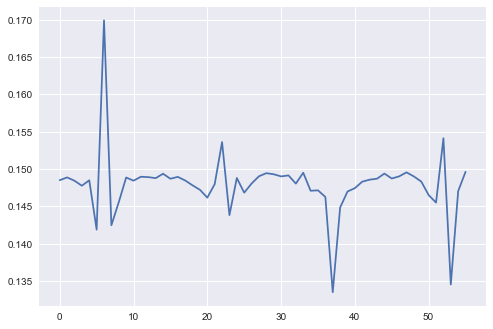

In [199]:
#compute_CGM_2_omega__i( d, check=False )
plt.plot(d.CGM_2_omega__i_60_260.omega_i)
d.CGM_2_omega__i_60_260.err_i

In [189]:
# %load D3_time_course.py
import attention
reload(attention)
from attention import *

import time_course


"""
=========
Load data
=========
"""

#event_data = cPickle.load(open('data/event_data.pickle'))
#N_data = len(event_data)


N_passes = 5


def compute_CGM_1_omega__i( d, check=False ):
    # basic
    #d = event_data[ d_idx ]
    attr_to_check = 'CGM_1_omega__i_60_260'
    #attr_to_check = 'CGM_2_omega__i_m100_450'
    # check
    if check:
        return d.can_load_attribute( attr_to_check )
    if d.can_load_attribute( attr_to_check ):
        print '[already done]'
        return None
    # get data
    for k in ['CG', 'CGM_1', 'tau_CGM_1']:
        d.load_attribute(k)
    # load spikes
    d.load_attribute('Y__tni')
    #d.Y__tni = d.Y__tni[:, :, 16:36].astype(float)
    d.Y__tni = d.Y__tni[:, :, :56].astype(float)
    I = d.Y__tni.shape[-1]

    # to save in
    results = Bunch()

    # extract data
    Omega__tn = d.CGM_1.Omega__tn
    tau = d.tau_CGM_2.tau
    Y__tni = d.Y__tni
    G__tn = d.CG.G__tn * d.S__ts.dot(d.CGM_1.Nu__sn)

    # a, Omega
    a__ni = log( Y__tni.sum(axis=0) / G__tn.sum(axis=0)[:, None] )
    Omega_squared__tn = Omega__tn ** 2

    # passes
    results = Bunch()
    results.passes = passes = []

    for pass_idx in progress.dots(range(N_passes)):

        # re-estimate omega
        if pass_idx > 0:
            # fit
            r = time_course.TimeCourse( 
                    d, Y__tni, omega_i / norm(omega_i), Omega__tn, 
                    a__ni, G__tn, tau=tau, verbose=False )
            m = Model({'Omega__tn':r.Omega__tn, 'rank':1})
            # extract a, Omega
            a__ni = r.a__ni
            Omega__tn = m.Omega__tn
            Omega_squared__tn = Omega__tn ** 2

        # solve for omega_i
        omega_i = np.zeros(I)
        err_i = np.zeros(I)
        for i in range(I):
            # for this bin
            a__n = a__ni[:, i]
            Y__tn = Y__tni[:, :, i]
            Z = (Y__tn * Omega__tn).sum()
            A__tn = np.exp( a__n[None, :] ) * G__tn
            AO = A__tn * Omega__tn
            AOO = A__tn * Omega_squared__tn
            # objective
            def LL( w ):
                return (-A__tn * np.exp( w * Omega__tn )).sum() + w * Z
            def negLL( w ):
                return -LL(w)
            # jacobian
            def dLL( w ):
                return (-AO * np.exp( w * Omega__tn )).sum() + Z
            def dnegLL( w ):
                return -A([ dLL( w ) ])
            # hessian
            def d2LL( w ):
                return (-AOO * np.exp( w * Omega__tn )).sum()
            def d2negLL( w ):
                return -d2LL( w )
            # newton steps
            w = 0
            for _ in range(2):
                w -= dnegLL(w) / d2negLL(w)
            omega_i[i] = w
            err_i[i] = np.sqrt( 1 / d2negLL(w) )

        # save this result
        passes.append( 
            Bunch({ 'omega_i':omega_i, 'err_i':err_i }) )
            # 'a__ni':a__ni, 'Omega__tn':Omega__tn, 

        if attr_to_check in d.available_attributes:
            print '[already done]'
            return None

    results.update( **passes[-1] )

    # save
    setattr( d, attr_to_check, results )
    d.save_attribute( attr_to_check )
"""
# job list
jobs = []
for d_idx in np.random.permutation( range( N_data ) ):
    for f in [ compute_CGM_2_omega__i ]:
        jobs.append((f, d_idx))


if __name__ == '__main__':
    # run
    for j in progress.numbers( jobs ):
        func, d = j
        func(d)
    pass
"""

"\n# job list\njobs = []\nfor d_idx in np.random.permutation( range( N_data ) ):\n    for f in [ compute_CGM_2_omega__i ]:\n        jobs.append((f, d_idx))\n\n\nif __name__ == '__main__':\n    # run\n    for j in progress.numbers( jobs ):\n        func, d = j\n        func(d)\n    pass\n"